## R Markdown

This is an R Markdown document. Markdown is a simple formatting syntax for authoring HTML, PDF, and MS Word documents. For more details on using R Markdown see <http://rmarkdown.rstudio.com>.

When you click the **Knit** button a document will be generated that includes both content as well as the output of any embedded R code chunks within the document. You can embed an R code chunk like this:

Note: if you have not installed the finalfit library, use `install.packages("corrplot")`.

In [1]:
library(conflicted)
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


In [2]:
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/dz/k8c4rxzs27v3q7ly5w31c95m0000gn/T//Rtmpdr6WX1/downloaded_packages


In [3]:
library(tidyverse)
library(corrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
corrplot 0.95 loaded



# Basic Statistics

R is a great tool for statistics as well. Here we will explore a few basic analysis options.
- Correlation
  + Measure of how well two variables hang together
  + Ranges from 1 to -1
- t-tests
  + Single group t-test
  + Independent samples t-test
  + Paired samples t-test
Note, R has many more advanced statistical analyses, these are just a few simple examples.

## mtcars data
We will use several different data frames for this session as various data formats are needed.
Including the introduction of the `mtcars` data frame.

Let's start by exploring the data.

In [4]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


Use the below code to see what the columns represent in the help pane.

In [5]:
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  ‘mpg’   Miles/(US) gallon                        
       [, 2]  ‘cyl’   Number of cylinders                      
       [, 3]  ‘disp’  Displacement (cu.in.)                    
       [, 4]  ‘hp’    Gross horsepower                         
       [, 5]  ‘drat’  Rear axle ratio                          
       [, 6]  ‘wt’    Weight (1000 lbs)                        
       [, 7]  ‘qsec’  1/4 mile time                            
       [, 8]  ‘vs’    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  ‘am’    Transmission (0 = automatic, 1 = manual) 
       [,10]  ‘gear’  Number of forward gears                  
       [,11]  ‘carb’  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.’

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

Get an idea of how the data is stored and descriptives of each column.

In [6]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

## Correlation
Correlations range from 1 to -1. A correlation coefficient of 1 means the two variables 
track perfectly in a positive direction. -1 represents two variables that are 
inversely related to each other (as one goes up the other goes down).

Use the `cor` command on a data frame to get the correlations of all numeric columns
in the data frame.
Note: the diagnol should always be 1 as each variable should correlate perfectly with itself.
Note: The data in the matrix is redundant. The top half and bottom half show the same
relationships.

In [7]:
car_corr = cor(mtcars)
car_corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


It can be very helpful to visualize the correlations. Here we use the `corrplot` command
from the corrplot package.
THe darker the color, the stronger the correlation. Red represents negative 
correlations while blue is used for positive correlations.

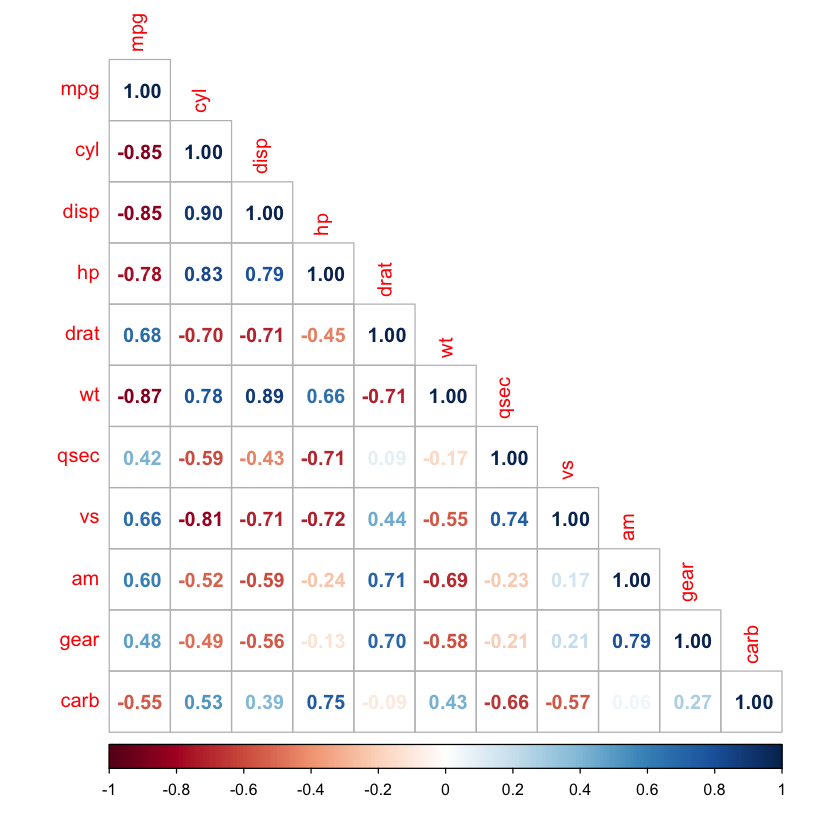

In [8]:
corrplot(car_corr, method="number", type="lower")

To get more details on a single correlation and to test it's significance, 
use the `cor.test` command. 

In [9]:
cor.test(mtcars$mpg, mtcars$hp)


	Pearson's product-moment correlation

data:  mtcars$mpg and mtcars$hp
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


This shows a significant correlation (p value less than .05).

Let's visualize the relationship!

`geom_smooth()` using formula = 'y ~ x'


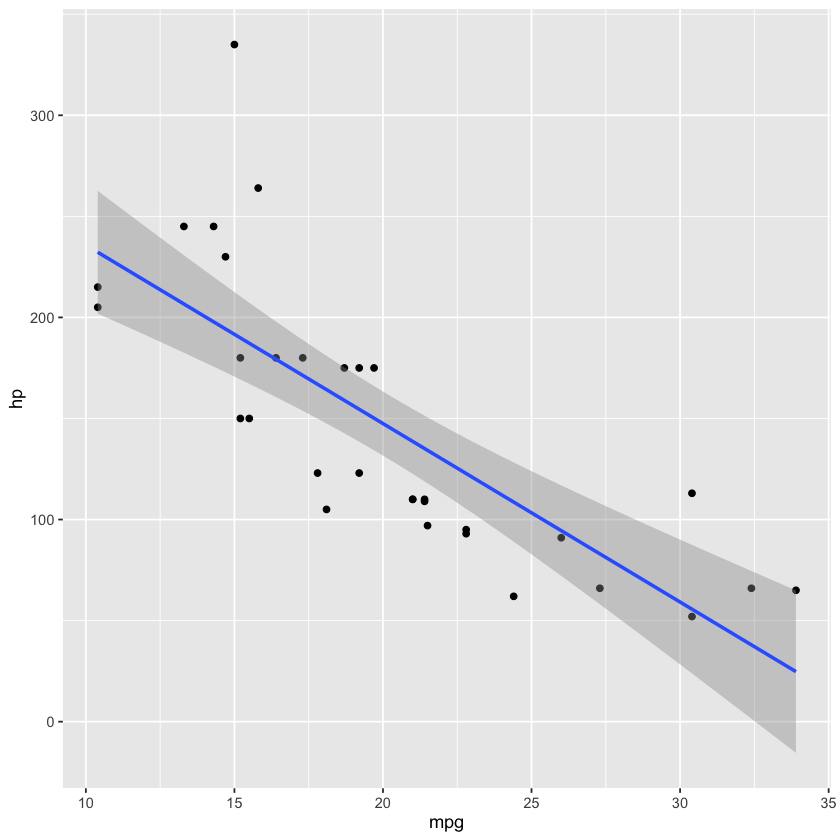

In [10]:
ggplot(mtcars, aes(x=mpg, y=hp)) + geom_point() + geom_smooth(method=lm)

## t-tests

### Single sample t-test

For a single sample t-test, a vector of numeric numbers is tested against a known value (mu).
The test determines if the vector differs from the set/known value.

Let's take a look at the weight of the cars in the dataset with a histogram to begin.

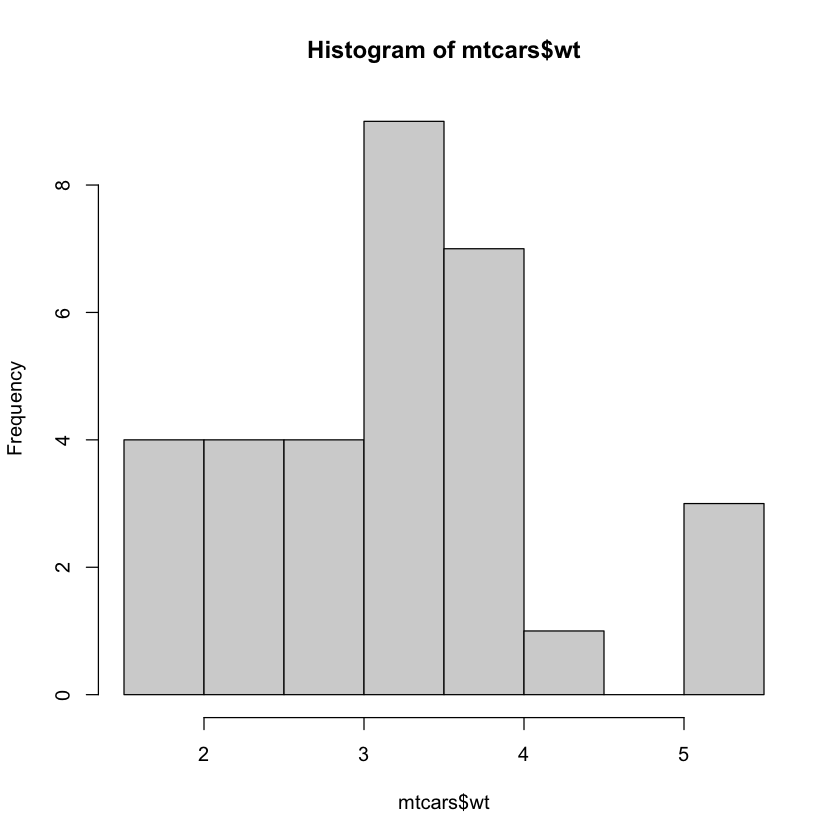

In [11]:
hist(mtcars$wt)

It looks like the distribution centers around 3, so let's test the weights against the value of 3.

In [12]:
t.test(mtcars$wt, mu=3)


	One Sample t-test

data:  mtcars$wt
t = 1.256, df = 31, p-value = 0.2185
alternative hypothesis: true mean is not equal to 3
95 percent confidence interval:
 2.864478 3.570022
sample estimates:
mean of x 
  3.21725 


Here, we see that the values do not differ from 3 (p-value greater than .05).
This makes sense since we chose a mu that based on the data.

In the real-world, this type of analysis may be useful to see if a sample differs
from a known population value. For example, if the height residents of a country differ
from the known global average. 

### Two samples independent t-test
A two samples independent t-test is used to compare two vectors and see if they come
from the same sample.

For this example, we will compare V-shaped engines with straight engines on mpg.

Here we can see that the column `vs` has two levels, 0 and 1.

In [13]:
unique(mtcars$vs)

[1] 0 1

Let's also find out how many of each type there are.

In [14]:
table(mtcars$vs)


 0  1 
18 14 

There are two ways to run the t-test. We can specify a numeric column and a binary
identifier column for groups or we can use two numeric vectors. 

Both methods will be demonstrated here, although they should yeild identical results.

In [15]:
t.test(mtcars$mpg~mtcars$vs)


	Welch Two Sample t-test

data:  mtcars$mpg by mtcars$vs
t = -4.6671, df = 22.716, p-value = 0.0001098
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -11.462508  -4.418445
sample estimates:
mean in group 0 mean in group 1 
       16.61667        24.55714 


We see from the results, that there is a significant difference in mpg based on engine type.
The means at the bottom tell us the average for each type.

Next, remember that you can subset data using a condition and column selection.
We will create two vectors, one for each engine type and re-run the analysis.
This is for demonstration purposes, you can choose either option and get the same results.

In [16]:
v_mpg = mtcars[mtcars$vs==0, "mpg"]
v_mpg
s_mpg = mtcars[mtcars$vs==1, "mpg"]
s_mpg
t.test(v_mpg, s_mpg)

[1] 21.0 21.0 18.7 14.3 16.4 17.3 15.2 10.4 10.4 14.7 15.5 15.2 13.3 19.2 26.0
[16] 15.8 19.7 15.0

[1] 22.8 21.4 18.1 24.4 22.8 19.2 17.8 32.4 30.4 33.9 21.5 27.3 30.4 21.4


	Welch Two Sample t-test

data:  v_mpg and s_mpg
t = -4.6671, df = 22.716, p-value = 0.0001098
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.462508  -4.418445
sample estimates:
mean of x mean of y 
 16.61667  24.55714 


Notice, the results are identical. This just demonstrates that the test can be run
with data in various formats.

Let's visualize the results with a bar graph.

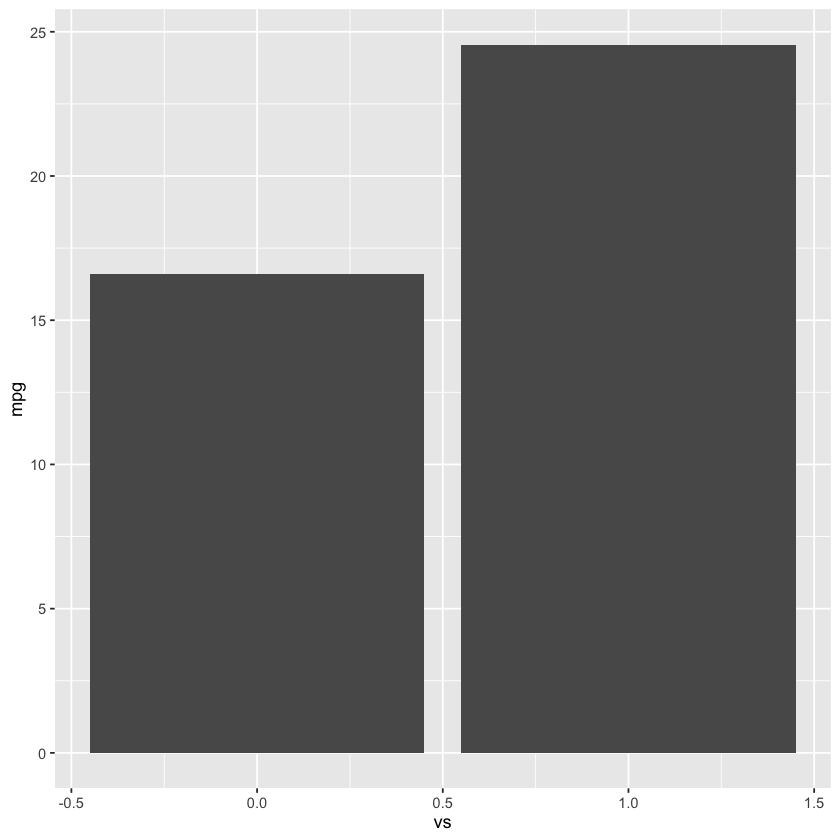

In [17]:
ggplot(mtcars, aes(x=vs, y=mpg)) + 
  geom_bar(stat = "summary", fun="mean")

Add error bars to the plot!
Begin by calculating mean and standard deviation.

In [18]:
mpg_barplot_data <- mtcars %>% group_by(vs) %>% summarize(mpg_M = mean(mpg), mpg_SD = sd(mpg))
mpg_barplot_data

vs,mpg_M,mpg_SD
<dbl>,<dbl>,<dbl>
0,16.61667,3.860699
1,24.55714,5.378978


Create the plot with the new dataset.

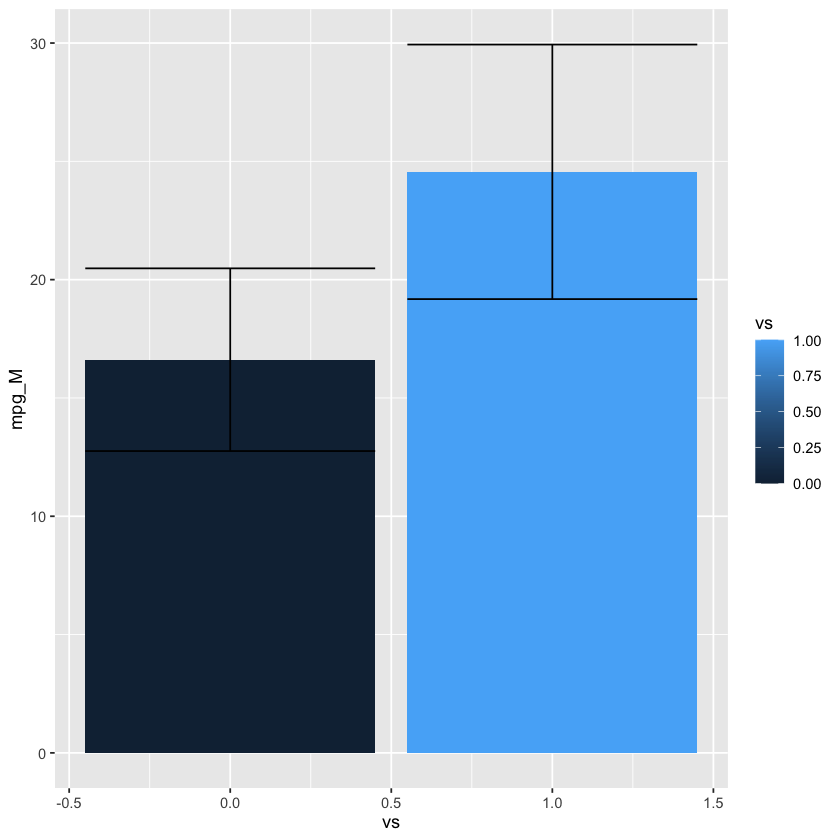

In [19]:
ggplot(mpg_barplot_data, aes(x=vs, y=mpg_M, fill=vs)) + 
  geom_bar(stat="identity", position="dodge") +
  geom_errorbar(data = mpg_barplot_data, 
      aes(ymin = mpg_M - mpg_SD, ymax = mpg_M + mpg_SD, y = mpg_M),
        position = position_dodge(width = .9))

### ChickWeight Data

We need another dataset to run a paired samples t-test. So we will load the
ChickWeight data set. We will start by examining the data and reshaping it.
Then we will run a paired samples t-test.

In [20]:
head(ChickWeight)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1


See the help for definitions of each column.

In [21]:
?ChickWeight

ChickWeight {datasets},R Documentation


Use the summary function to get an idea of the data in each column.

In [22]:
summary(ChickWeight)

     weight           Time           Chick     Diet   
 Min.   : 35.0   Min.   : 0.00   13     : 12   1:220  
 1st Qu.: 63.0   1st Qu.: 4.00   9      : 12   2:120  
 Median :103.0   Median :10.00   20     : 12   3:120  
 Mean   :121.8   Mean   :10.72   10     : 12   4:118  
 3rd Qu.:163.8   3rd Qu.:16.00   17     : 12          
 Max.   :373.0   Max.   :21.00   19     : 12          
                                 (Other):506          

We want to reshape the data so we can easily pull each day from its own column.

We use the `reshape` method to turn the data from long to wide format.

In [23]:
ChickWeightWide = reshape(ChickWeight, idvar = c("Chick", "Diet"), timevar = "Time", direction="wide")
ChickWeightWide

,Chick,Diet,weight.0,weight.2,weight.4,weight.6,weight.8,weight.10,weight.12,weight.14,weight.16,weight.18,weight.20,weight.21
,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,42,51,59,64,76,93,106,125,149,171,199,205
13,2,1,40,49,58,72,84,103,122,138,162,187,209,215
25,3,1,43,39,55,67,84,99,115,138,163,187,198,202
37,4,1,42,49,56,67,74,87,102,108,136,154,160,157
49,5,1,41,42,48,60,79,106,141,164,197,199,220,223
61,6,1,41,49,59,74,97,124,141,148,155,160,160,157
73,7,1,41,49,57,71,89,112,146,174,218,250,288,305
85,8,1,42,50,61,71,84,93,110,116,126,134,125,NA
96,9,1,42,51,59,68,85,96,90,92,93,100,100,98


Missing data will throw off the analysis, so we want to check for missing data.

In [24]:
any(is.na(ChickWeightWide))
sum(is.na(ChickWeightWide))

[1] TRUE

[1] 22

We see that there are 22 missing data points. 

We use the `complete.cases` function to drop rows with missing data.

In [25]:
ChickWeightWide = ChickWeightWide[complete.cases(ChickWeightWide), ]
ChickWeightWide

,Chick,Diet,weight.0,weight.2,weight.4,weight.6,weight.8,weight.10,weight.12,weight.14,weight.16,weight.18,weight.20,weight.21
,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,42,51,59,64,76,93,106,125,149,171,199,205
13,2,1,40,49,58,72,84,103,122,138,162,187,209,215
25,3,1,43,39,55,67,84,99,115,138,163,187,198,202
37,4,1,42,49,56,67,74,87,102,108,136,154,160,157
49,5,1,41,42,48,60,79,106,141,164,197,199,220,223
61,6,1,41,49,59,74,97,124,141,148,155,160,160,157
73,7,1,41,49,57,71,89,112,146,174,218,250,288,305
96,9,1,42,51,59,68,85,96,90,92,93,100,100,98
108,10,1,41,44,52,63,74,81,89,96,101,112,120,124


Note, we lost 5 rows of data due to missing data.

### Paired Samples t-test
We can now compare the first and second time points.

In [26]:
t.test(ChickWeightWide$weight.0, ChickWeightWide$weight.2, paired = TRUE)


	Paired t-test

data:  ChickWeightWide$weight.0 and ChickWeightWide$weight.2
t = -17.409, df = 44, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -9.496402 -7.525820
sample estimates:
mean difference 
      -8.511111 


We can plot the average weight at each point and see that, as we might expect, 
weight goes up at each subsequent timepoint.

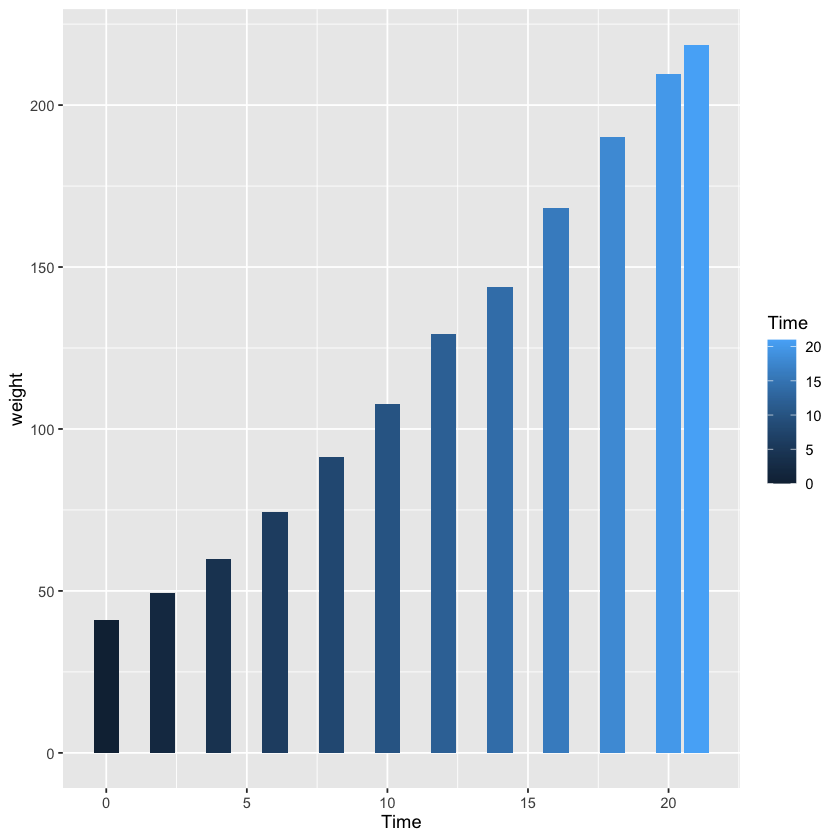

In [27]:
ggplot(ChickWeight, aes(x=Time, y=weight, fill=Time)) + 
  geom_bar(stat = "summary", fun="mean")

This concludes the introduction to analysis in R!